In [1]:
import importlib
from SpLSI import generate_topic_model as gen_model
from SpLSI.utils import *
from SpLSI import splsi_
import numpy as np
import pandas as pd
import networkx as nx
import community as community_louvain  
from sklearn.metrics.pairwise import euclidean_distances
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import networkx as nx
import community as community_louvain  
from sklearn.metrics.pairwise import euclidean_distances
from scipy.sparse.linalg import svds

In [3]:
importlib.reload(gen_model)
importlib.reload(splsi_)

<module 'SpLSI.splsi_' from '/Users/zhangzeyu/Downloads/research/SpLSI/SpLSI/splsi_.py'>

## K = 4

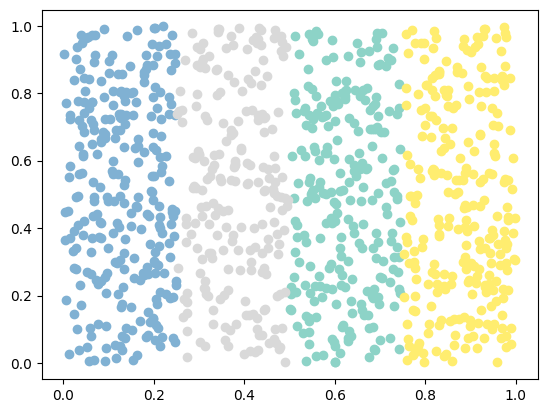

In [3]:
coords_df_4 = gen_model.generate_graph(100, 1000, 30, 4, 0.05)
gen_model.plot_scatter(coords_df_4)
W_4 = gen_model.generate_W_strong(coords_df_4, 100, 1000, 30, 4, 0.05) 
L_4 = np.diag(np.random.rand(min(W_4.shape)))
V_4, _ = np.linalg.qr(np.random.randn(2 * W_4.shape[0], W_4.shape[0]))
X_4 = W_4.T @ L_4 @ V_4.T
weights_4, edge_df_4 = gen_model.generate_weights_edge(coords_df_4, 3, 0.1)

In [4]:
model_hooi_4 = splsi_.SpLSI_(lamb_start=0.001,step_size=1.2,grid_len=29,method="hooi",verbose=0,eps=1e-05,normalize=True,L_inv_=True)
model_hooi_4.fit(X_4, 4, edge_df_4, weights_4)

Running spatial HOSVD...
Initializing..


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxclu

Optimal lambda is 0.011390625...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.038337599924474726...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.038337599924474726...
SpatialSVD ran for 2 steps.
Running SPOC...


In [6]:
U_4 = model_hooi_4.U
V_hat_4 = model_hooi_4.V

In [7]:
L2_error_U_4 = get_l2_err(W_4, U_4)
L2_error_V_4 = get_l2_err(V_4.T, V_hat_4)
moran_score_4, _ = moran(U_4, edge_df_4)
pas_score_4 = get_PAS(U_4, edge_df_4)
print(f"L2 norm error between the true and predicted assignment matrices is {L2_error_U_4}")
print(f"L2 norm error between the true and predicted aV is {L2_error_V_4}")
print(f"Moran score for the predicted assignment matrices is {moran_score_4}")
print(f"Pas score for the predicted assignment matrices is {pas_score_4}")

L2 norm error between the true and predicted assignment matrices is 60.98647345995012
L2 norm error between the true and predicted aV is 6.359771066391075
Moran score for the predicted assignment matrices is 0.9267938502977076
Pas score for the predicted assignment matrices is 0.953


In [29]:
accuracy_4 = group_and_compare(U_4, coords_df_4)
print(f"Clustering Accuracy: {accuracy_4:.2f}")

Clustering Accuracy: 0.99


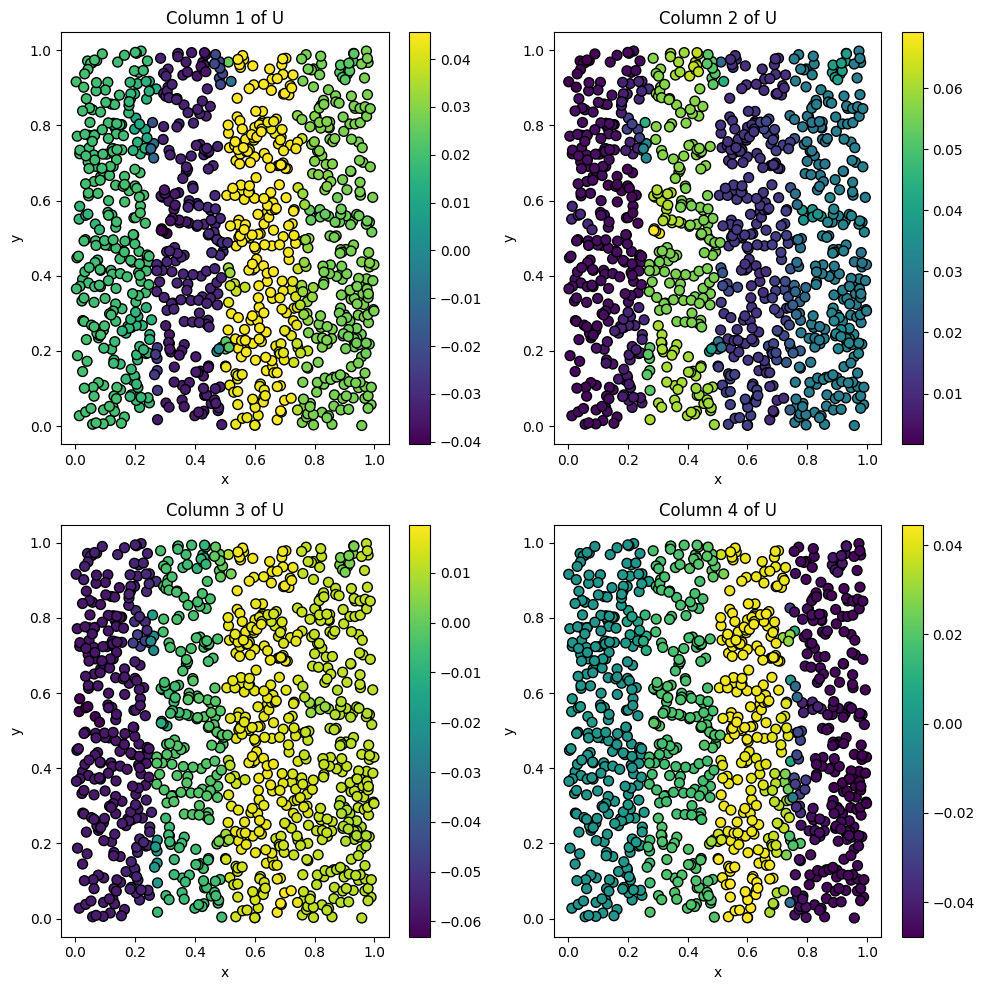

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes = axes.flatten()

for i in range(4):
    sc = axes[i].scatter(coords_df_4['x'], coords_df_4['y'], c=U_4[:, i], cmap='viridis', s=50, edgecolor='k')
    axes[i].set_title(f'Column {i + 1} of U')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    plt.colorbar(sc, ax=axes[i], orientation='vertical')

plt.tight_layout()
plt.show()

## K = 6

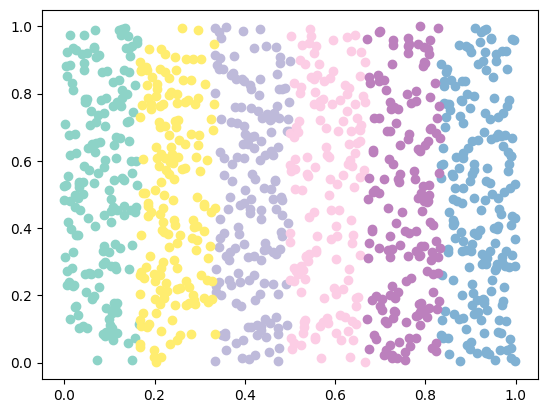

In [13]:
coords_df_6 = gen_model.generate_graph(100, 1000, 30, 6, 0.05)
gen_model.plot_scatter(coords_df_6)
W_6 = gen_model.generate_W_strong(coords_df_6, 100, 1000, 30, 6, 0.05) 
L_6 = np.diag(np.random.rand(min(W_6.shape)))
V_6, _ = np.linalg.qr(np.random.randn(2 * W_6.shape[0], W_6.shape[0]))
X_6 = W_6.T @ L_6 @ V_6.T
weights_6, edge_df_6 = gen_model.generate_weights_edge(coords_df_6, 3, 0.1)

In [14]:
model_hooi_6 = splsi_.SpLSI_(lamb_start=0.001,step_size=1.2,grid_len=29,method="hooi",verbose=0,eps=1e-05,normalize=True,L_inv_=True)
model_hooi_6.fit(X_6, 6, edge_df_6, weights_6)

Running spatial HOSVD...
Initializing..


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxclu

Optimal lambda is 0.038443359375...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.1144754599728827...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.09539621664406893...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.09539621664406893...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.09539621664406893...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.09539621664406893...
SpatialSVD ran for 5 steps.
Running SPOC...


In [15]:
U_6 = model_hooi_6.U
V_hat_6 = model_hooi_6.V

In [16]:
L2_error_U_6 = get_l2_err(W_6, U_6)
L2_error_V_6 = get_l2_err(V_6.T, V_hat_6)
moran_score_6, _ = moran(U_6, edge_df_6)
pas_score_6 = get_PAS(U_6, edge_df_6)
print(f"L2 norm error between the true and predicted assignment matrices is {L2_error_U_6}")
print(f"L2 norm error between the true and predicted aV is {L2_error_V_6}")
print(f"Moran score for the predicted assignment matrices is {moran_score_6}")
print(f"Pas score for the predicted assignment matrices is {pas_score_6}")

L2 norm error between the true and predicted assignment matrices is 56.918377282100394
L2 norm error between the true and predicted aV is 7.023120129156836
Moran score for the predicted assignment matrices is 0.9415553358867039
Pas score for the predicted assignment matrices is 0.906


In [31]:
accuracy_6 = group_and_compare(U_6, coords_df_6)
print(f"Clustering Accuracy: {accuracy_6:.2f}")

Clustering Accuracy: 0.94


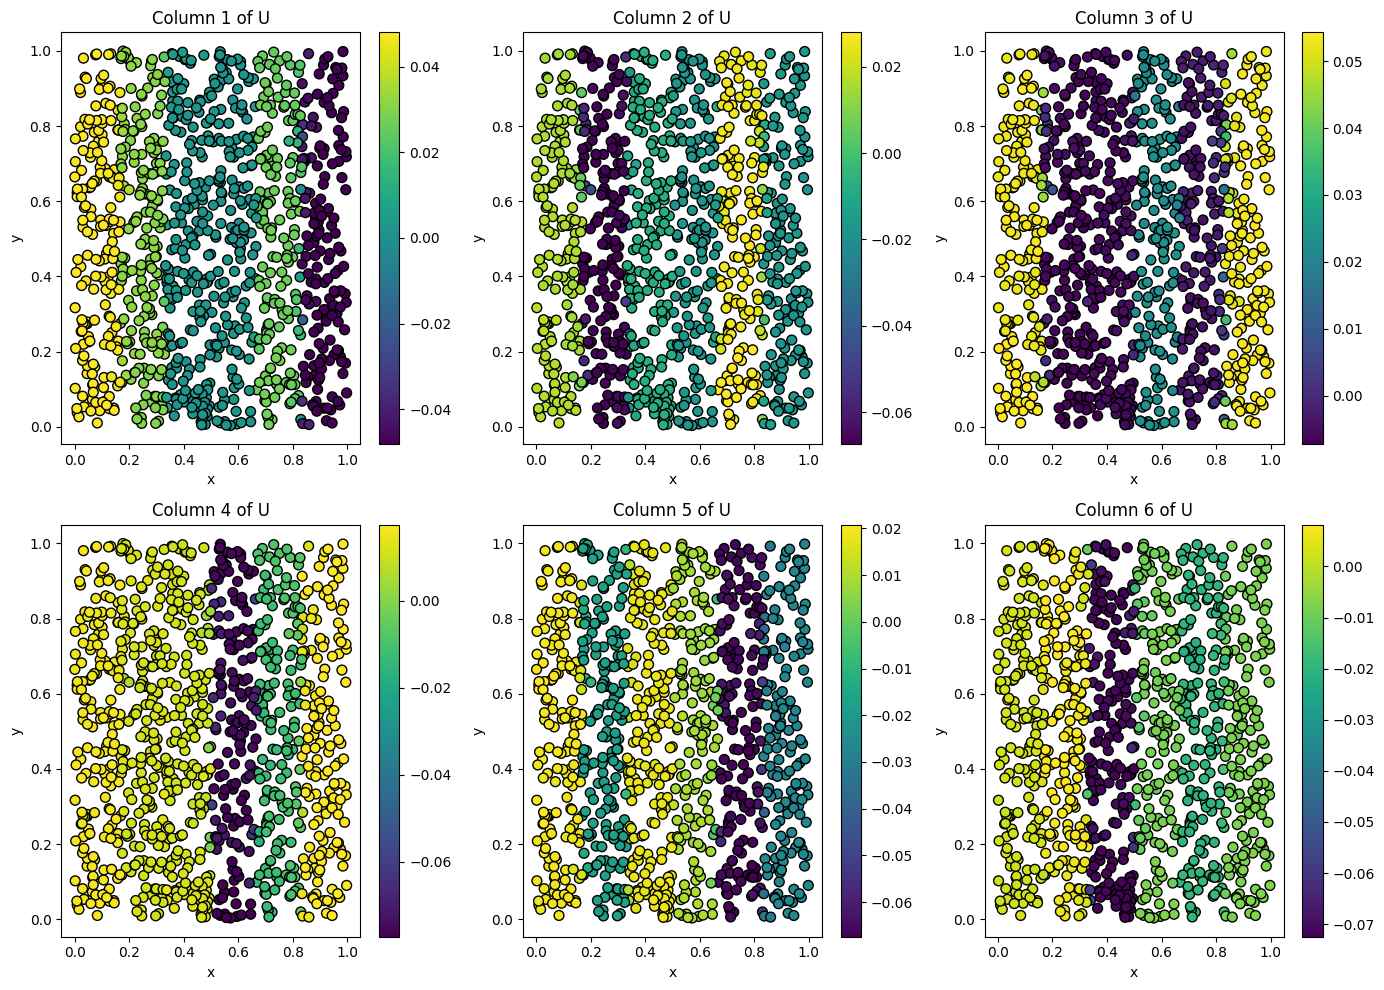

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

axes = axes.flatten()

for i in range(6):
    sc = axes[i].scatter(coords_df_6['x'], coords_df_6['y'], c=U_6[:, i], cmap='viridis', s=50, edgecolor='k')
    axes[i].set_title(f'Column {i + 1} of U')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    plt.colorbar(sc, ax=axes[i], orientation='vertical')

plt.tight_layout()
plt.show()

## K = 8

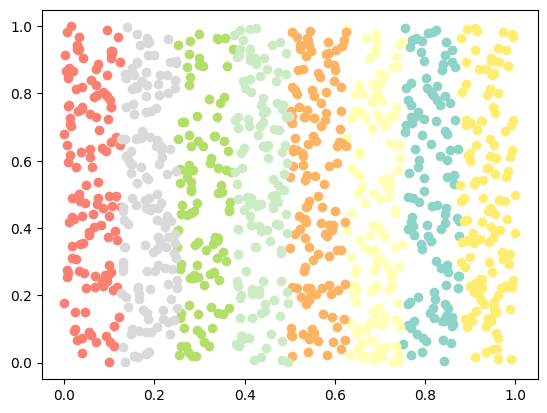

In [20]:
coords_df = gen_model.generate_graph(100, 1000, 30, 8, 0.05)
gen_model.plot_scatter(coords_df)
W = gen_model.generate_W_strong(coords_df, 100, 1000, 30, 8, 0.05) 
L = np.diag(np.random.rand(min(W.shape)))
V, _ = np.linalg.qr(np.random.randn(W.shape[0], W.shape[0]))
X = W.T @ L @ V.T
weights, edge_df = gen_model.generate_weights_edge(coords_df, 3, 0.1)

In [21]:
model_hooi = splsi_.SpLSI_(lamb_start=0.001,step_size=1.2,grid_len=29,method="hooi",verbose=0,eps=1e-05,normalize=True,L_inv_=True)
model_hooi.fit(X, 8, edge_df, weights)
U = model_hooi.U

Running spatial HOSVD...
Initializing..


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Optimal lambda is 0.011390625...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.026623333280885227...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.022186111067404354...
Taking L_inv...
Taking L_inv...


/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/admm.py:31: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/zhangzeyu/Downloads/research/SpLSI/.venv/lib/python3.9/site-packages/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


Normalizing...
Optimal lambda is 0.022186111067404354...
SpatialSVD ran for 3 steps.
Running SPOC...


In [22]:
L2_error = get_l2_err(W, U)
moran_score, _ = moran(U, edge_df)
pas_score = get_PAS(U, edge_df)
print(f"L2 norm error between the true and predicted assignment matrices is {L2_error}")
print(f"Moran score for the predicted assignment matrices is {moran_score}")
print(f"Pas score for the predicted assignment matrices is {pas_score}")

L2 norm error between the true and predicted assignment matrices is 68.40282856076396
Moran score for the predicted assignment matrices is 0.9044801392763595
Pas score for the predicted assignment matrices is 0.833


In [23]:
L2_error = get_l2_err(W, X)
moran_score, _ = moran(X, edge_df)
pas_score = get_PAS(X, edge_df)
print(f"L2 norm error between the true and chaos matrices is {L2_error}")
print(f"Moran score for the chaos assignment matrices is {moran_score}")
print(f"Pas score for the chaos assignment matrices is {pas_score}")

L2 norm error between the true and chaos matrices is 84.83360516399935
Moran score for the chaos assignment matrices is 0.6753899726765596
Pas score for the chaos assignment matrices is 0.528


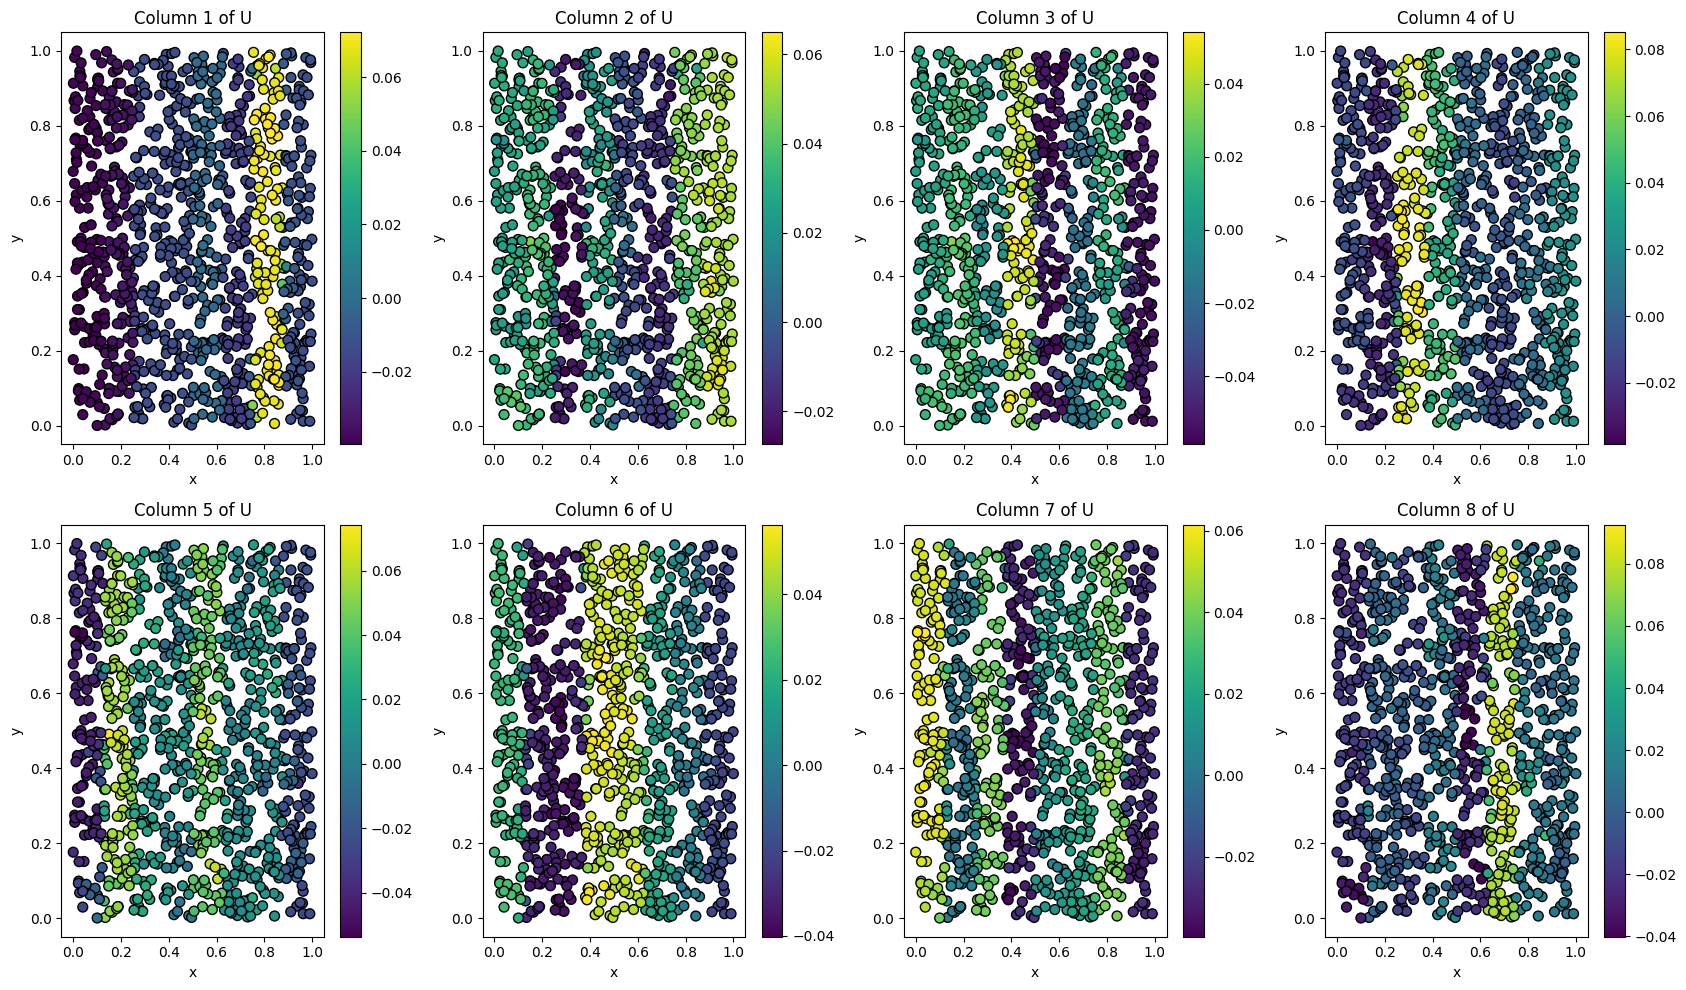

In [24]:
fig, axes = plt.subplots(2, 4, figsize=(17, 10))

axes = axes.flatten()

for i in range(8):
    sc = axes[i].scatter(coords_df['x'], coords_df['y'], c=U[:, i], cmap='viridis', s=50, edgecolor='k')
    axes[i].set_title(f'Column {i + 1} of U')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    plt.colorbar(sc, ax=axes[i], orientation='vertical')

plt.tight_layout()
plt.show()

## K = 10